# Diagrama de Minkowski
**Feito por:** Luiza Valezim

**Última data de modificação:** 28/10/2022

#### Descrição 

Esse notebook apresenta um diagrama de Minkowski interativo e as explicações dos cálculos para chegar nos devidos valores. Para simplificações futuras, foram adotadas as unidades de medida relativas a velocidade da luz, portanto foi considerado $c = 1$.

Esse diagrama considera dois eventos: **A** e **B**, no qual consideramos que o A (representante das coordenadas x, ct) seria o nosso referencial parado e B (com as coordenadas x', ct') como sendo referencial em movimento. No nosso caso, estamos simulando a dilatação do tempo e do espaço quando o observador B passa com velocidade $v$ pelo observador A. 

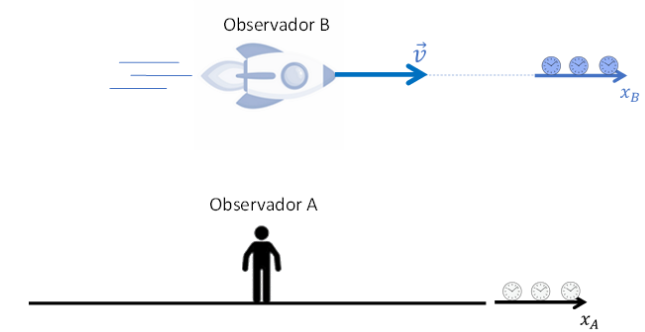

**Importando as bibliotecas**

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider
%matplotlib inline

**Declarando as variáveis globais**

In [3]:
c = 3*1e8

### Funções Auxiliares

**Fator de Lorentz (gamma)**

$$ \gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}  $$

In [4]:
def calcula_gamma(v):
    gamma = 1 / (1 - (v**2/c**2))**0.5
    return gamma

**Transformações de Lorentz**

$$ 
x = \gamma \cdot (x' + v \cdot t') \\
t = \gamma \cdot (t' + \frac {v}{c^2} \cdot t')
$$

$$
x' = \gamma \cdot (x - v \cdot t) \\
t' = \gamma \cdot (t - \frac {v}{c^2} \cdot t) 
$$

Para simplificações de contas, consideramos a velocidade da luz ($c$) como sendo igual a 1, já que a unidade de medida utilizada para distância é proporcional à essa velocidade (como $sluz$).

Assim, obtivemos as seguintes fórmulas simplificadas:
$$
x = \frac{(x' + v \cdot t')}{\sqrt{1-v^2}} \space \space \space \space \space
t = \frac{(t' + v \cdot x')}{\sqrt{1-v^2}} 
$$


$$
x' = \frac{(x - v \cdot t)}{\sqrt{1-v^2}} \space \space \space \space \space
t' = \frac{(t - v \cdot x)}{\sqrt{1-v^2}}
$$

In [5]:
# Para descobrirmos x e t
def transf_lorentz(x_linha, t_linha, v):
    x = (x_linha + t_linha*v) / (1-v**2)**0.5
    t = (t_linha + x_linha*v) / (1-v**2)**0.5
    return x, t

# Para descobrirmos x_linha e t_linha
def transf_lorentz_linha(x, t, v):
    x_linha = (x - t*v) / (1-v**2)**0.5
    t_linha = (t - x*v) / (1-v**2)**0.5
    return x_linha, t_linha

**Intervalo invariante**

O intervalo invariante é o que consideramos como uma medida de “distância” que não muda, relacionada ao intervalo de tempo e ao deslocamento no espaço. Como o próprio nome diz, ele sempre deverá ser igual caso estejamos comparando dois eventos.

$$
i^2 = {ct}^2 - x^2
$$

In [6]:
# Calcula o intervalo invariante de um sistema
def calcula_intervalo_invariante(x, t, l):
    int_inv = round(t**2 - x**2, 2)
    print("O intervalo invariante é de {0}: {1}".format(l, int_inv))

# Compara o intervalo invariante dos dois sistemas
def compara_intervalo_invariante(x_a, t_a, x_b, t_b):
    int_a = calcula_intervalo_invariante(x_a, t_a)
    int_b = calcula_intervalo_invariante(x_b, t_b)
    
    if (int_a == int_b):
        return True
    else:
        return False

**Encontra o ângulo da reta**

In [7]:
def findAngle(M1, M2):
     
    # Store the tan value  of the angle
    angle = abs((M2 - M1) / (1 + M1 * M2))
 
    # Calculate tan inverse of the angle
    angle_radians = math.atan(angle)
 
    # Convert the angle from
    # radian to degree
    angle_degrees = math.degrees(angle_radians)
    
    # Print the result
    #print ("O ângulo formado é de: {0}".format(round(angle_degrees, 4)))
    
    return angle_radians

**Desenha ponto e legenda**

In [8]:
def draw_point(x, y, color):
    plt.scatter(x, y, color=color)
    txt_a = '('+ str(round(x,3)) + ', '+ str(round(y,3)) + ')'
    plt.text(x + 0.3, y + 0.3, txt_a)    

### Função Principal

In [46]:
def diagram(v, x, ct, zoom):
    
    # Definindo os dominios de x
    eixo_x = np.linspace(-zoom, zoom, num=1000)
    
    # Calculando o ângulo formado pelo eixo x'
    angle = findAngle(0, v) 
    # Calculando a tangente do eixo ct'
    tg = math.tan(angle)
    inverted_tg = math.tan((2*math.pi/4) - angle)
 
    # Retas formadas pela velocidade desejada
    plt.plot(eixo_x, eixo_x*v, c="blue", label="eixo x'")
    plt.plot(eixo_x, eixo_x*inverted_tg, c="blue", label="eixo ct'")
    
    # Retas formadas pela velocidade da luz
    plt.plot(eixo_x, eixo_x, c="orange", label="v = c")
    plt.plot(eixo_x, -eixo_x, c="orange")
    
    # Desenha reta entre eixo e evento B    
    #plt.plot(eixo_x, eixo_x*v + ct - x*tg, c="yellow", linestyle='--')
    #plt.plot(eixo_x, (eixo_x - x)*inverted_tg + ct, c="yellow", linestyle='--')  
    
    # Descobrindo os pontos para x' = 0 e ct' = 0
    x_linha, ct_linha = transf_lorentz_linha(x, ct, v)
    x1, ct1 = transf_lorentz(x_linha, 0, v)
    x2, ct2 = transf_lorentz(0, ct_linha, v)
    plt.plot([x, x1], [ct, ct1], c="purple", linestyle='--')
    plt.plot([x, x2], [ct, ct2], c="purple", linestyle="--")
    plt.scatter(x1, ct1, color="purple")
    plt.scatter(x2, ct2, color="purple")
    
    # Desenhando o evento em A em relação à A (sempre nulo)
    draw_point(0, 0, 'red')
    
    # Desenhando o evento B (input)
    draw_point(x, ct, 'purple')
    
    # Desenhando o evento em B em relação à A
    print("\nx = {0}, ct = {1}".format(round(x,3), round(ct,3)))
    print("x' = {0}, ct' = {1}\n".format(round(x_linha,3), round(ct_linha,3)))
    
    # Calcula o intervalo invariante
    calcula_intervalo_invariante(x, ct, "A")
    calcula_intervalo_invariante(x_linha, ct_linha, "B")
    
    plt.title('Diagrama de Minkowski')
    plt.grid()    
    plt.xlabel("x")
    plt.ylabel("ct")
    plt.ylim(-zoom, zoom)
    plt.legend()
    plt.show()

In [49]:
interactive_plot = interactive(diagram, v=(0.0, 1.0, 0.01), x=(0, 20, 0.1), ct=(0, 20, 0.1), zoom=(5, 25, 1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='v', max=1.0, step=0.01), FloatSlider(value=10.0, des…

---

# Gráfico do comportamento do gamma dependendo da velocidade

Como adicional, achei interessante plotar o gráfico do comportamento do gamma quando aumentamos a velocidade

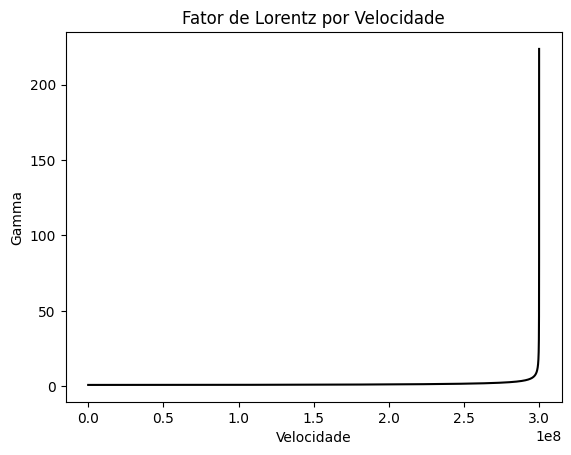

In [516]:
# Quanto maior o "step" do eixo x, mais dá para notar que o gamma tende à infinito 
step = 1e-5
velocidades = np.arange(0*c, 1*c, step*c)
gammas = []

for vel in velocidades:
    gamma = calcula_gamma(vel)
    gammas.append(gamma)
    
# Plotando gráfico do gamma por velocidade
plt.plot(velocidades, gammas)
plt.title('Fator de Lorentz por Velocidade')
plt.xlabel('Velocidade')
plt.ylabel('Gamma')
plt.show()

**Conclusões:**
- Quanto menor a velocidade, $\gamma$ tende à 1;
- Quanto maior a velocidade, $\gamma$ tende à infinito;
- Quanto menor for o step, maior será a aproximação para infinito quando a velocidade tender à $c$. Isso se deve pela limitação computacional que temos ao lidar com números muito grandes.

---